In [1]:
import pandas as pd
import numpy as np
import re 
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import emoji
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
import get_tweets

%matplotlib inline

In [2]:
conservative  = pd.read_csv("data/conservative.csv")
liberal  = pd.read_csv("data/liberal.csv")

In [3]:
conservative.head()
liberal.head()

,Unnamed: 0,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,hashtags,...,retweet_count,retweeted,retweeted_status_id,source,text,topic,truncated,user_id,user_mentions,withheld_in_countries
0,0,NaN,NaN,2020-08-15 16:56:35+00:00,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,NaN,NaN,...,1188,False,1.294341e+18,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @horn: Das Gesundheitsamt in Trier klagt üb...,coronavirus,False,23748576,Dennis Horn,NaN
1,1,NaN,NaN,2020-08-15 16:56:35+00:00,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,NaN,NaN,...,0,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",@XanderKoolman Het coronavirus is echt een eco...,coronavirus,False,82467388,Xander Koolman,NaN
2,2,NaN,NaN,2020-08-15 16:56:35+00:00,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,NaN,NaN,...,23,False,1.294666e+18,"<a href=""http://twitter.com/download/iphone"" r...",RT @robbysikka: Incredibly proud of this work....,coronavirus,False,47207043,"Robby Sikka, Yale School of Public Health",NaN
3,3,NaN,NaN,2020-08-15 16:56:35+00:00,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,NaN,NaN,...,85,False,1.294635e+18,"<a href=""http://twitter.com/download/iphone"" r...",RT @BeholdIsrael: 1 in 2 Russian Doctors Distr...,coronavirus,False,1035966863308718080,Amir Tsarfati,NaN
4,4,NaN,NaN,2020-08-15 16:56:35+00:00,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,NaN,NaN,...,25,False,1.294435e+18,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @CT_Bergstrom: @Newsweek Here's is the rele...,coronavirus,False,19503588,"Carl T. Bergstrom, Newsweek",NaN


In [4]:
conservative_clean = get_tweets.clean_tweets(conservative)
conservative_clean.head()

/Users/sawyer/Desktop/Data Science @ Denver/Summer 2020/DS Tools/Final_Project/get_tweets.py:144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaner['text'] = data_cleaner['text'].apply(lambda x: replace_foreign_characters(x)).str.strip()
/Users/sawyer/Desktop/Data Science @ Denver/Summer 2020/DS Tools/Final_Project/get_tweets.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaner['text'] = data_cleaner.text.apply(text_cleaner)


,Unnamed: 0,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,hashtags,...,retweeted,retweeted_status_id,source,text,topic,truncated,user_id,user_mentions,emoji,tweet_len
0,0,NaN,NaN,2020-08-15 16:56:02+00:00,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,NaN,NaN,...,False,1.294653e+18,"<a href=""https://mobile.twitter.com"" rel=""nofo...",If USPS $ issue get fixed partly bc rural stat...,trump,False,30376473,Jonathan Martin,[],126
1,1,NaN,NaN,2020-08-15 16:56:02+00:00,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,NaN,NaN,...,False,1.294671e+18,"<a href=""http://twitter.com/download/android"" ...",Turns Steve Bannon Erik Prince track prison,trump,False,3306060256,Palmer Report,[],73
2,2,NaN,NaN,2020-08-15 16:56:02+00:00,"{'hashtags': [{'text': 'gapol', 'indices': [79...",NaN,0,False,NaN,gapol,...,False,1.294660e+18,"<a href=""http://twitter.com/download/iphone"" r...","As Trump struggle Georgia , Democrats press go...",trump,False,3551046323,Greg Bluestein,[],71
3,3,NaN,NaN,2020-08-15 16:56:02+00:00,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,NaN,NaN,...,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",trump anything stopping racism anytime,trump,True,840347399725948928,"John D'Addona, Ezundercover, 𝐀𝐥𝐢, LeBron James",[],61
4,4,NaN,NaN,2020-08-15 16:56:02+00:00,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,NaN,NaN,...,False,NaN,"<a href=""http://twitter.com/download/android"" ...",I cried frustration . How dumb could Americans...,trump,True,94132483,NaN,[],115


In [5]:
liberal_clean = get_tweets.clean_tweets(liberal)
liberal_clean.head()

,Unnamed: 0,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,hashtags,...,retweeted_status_id,source,text,topic,truncated,user_id,user_mentions,withheld_in_countries,emoji,tweet_len
0,0,NaN,NaN,2020-08-15 16:56:35+00:00,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,NaN,NaN,...,1.294341e+18,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Das Gesundheitsamt Trier klagt ber Probleme mi...,coronavirus,False,23748576,Dennis Horn,NaN,[],130
1,1,NaN,NaN,2020-08-15 16:56:35+00:00,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,NaN,NaN,...,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Het coronavirus echt een economie geworden h ?,coronavirus,False,82467388,Xander Koolman,NaN,[],50
2,2,NaN,NaN,2020-08-15 16:56:35+00:00,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,NaN,NaN,...,1.294666e+18,"<a href=""http://twitter.com/download/iphone"" r...",Incredibly proud work . given world country te...,coronavirus,False,47207043,"Robby Sikka, Yale School of Public Health",NaN,[],115
3,3,NaN,NaN,2020-08-15 16:56:35+00:00,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,NaN,NaN,...,1.294635e+18,"<a href=""http://twitter.com/download/iphone"" r...",1 2 Russian Doctors Distrust New Coronavirus V...,coronavirus,False,1035966863308718080,Amir Tsarfati,NaN,[],63
4,4,NaN,NaN,2020-08-15 16:56:35+00:00,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,NaN,NaN,...,1.294435e+18,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Here 's relevant part CDC statement . . . The ...,coronavirus,False,19503588,"Carl T. Bergstrom, Newsweek",NaN,[],93


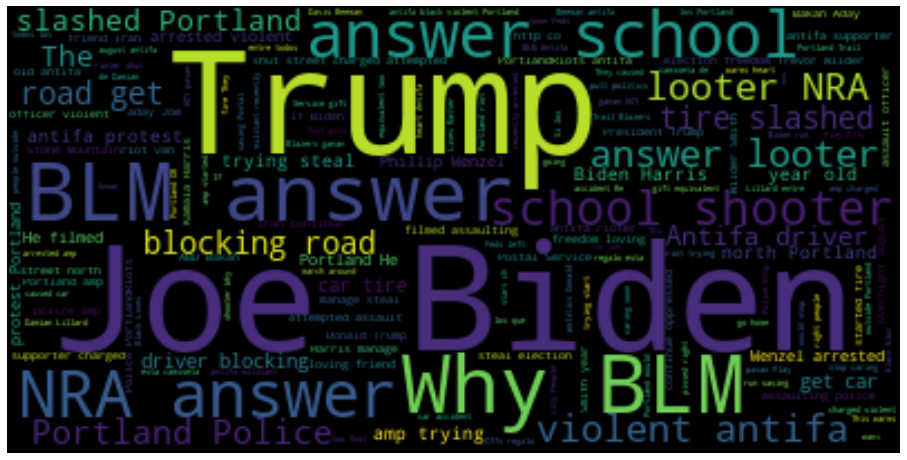

In [6]:
our_tweets = ' '.join(conservative_clean['text'].to_list())
wordcloud = WordCloud().generate(our_tweets)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

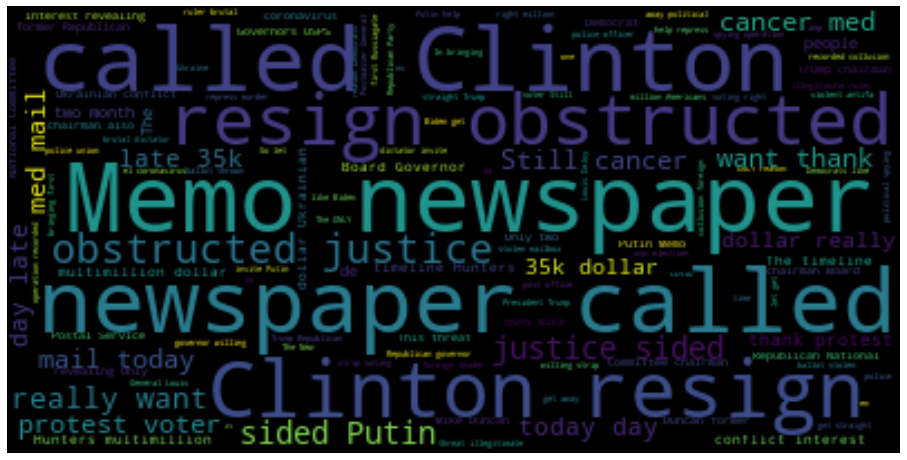

In [7]:
our_tweets = ' '.join(liberal_clean['text'].to_list())
wordcloud = WordCloud().generate(our_tweets)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()